# End-to-end Multil-class e-commerce  Classification
* This notebook builds an end-to-end multi-class image classifierdeep learning based image classifier using TensorFlow(2.2.0) and keras.

## 1.Problem
* To classify whether images contain either a saree or a shirt or t-shirt.

## 2.Data
* The data we're using is from amazon website where scrap the images of saree,shirt and t-shirts.

* https://www.amazon.in/ref=nav_logo

## 3.Evaluation
* The evaluation is a file with prediction probabilities for each Saree,shirt and t-shirt of each test image.

## 4.Features
Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* Predict the image is saree,shirt or t-shirt (0 = saree,2=shirt,1=t-shirt)
* There are around 240 images in the training set.
* There are around 60 images in the test set (these images have no labels, because we'll want to predict them).




## Import Packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import os
from os import listdir
import shutil
import cv2
import random
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import random



## Explore the Data


In [2]:
#lets define the paths labels(Sarees,shirts,Tshirts) of test ,train and augmented datasets
# Train
saree_dir_train = "./ama-clothes/train/Saree"
shirt_dir_train = "./ama-clothes/train/shirts"
t_shirt_dir_train = "./ama-clothes/train/Tshirts"

#Test
saree_dir_test = "./ama-clothes/test/Saree"
shirt_dir_test = "./ama-clothes/test/shirts"
t_shirt_dir_test = "./ama-clothes/test/Tshirts"

#Augmented
saree_dir_aug = "./ama-clothes/augmented/Saree"
shirt_dir_aug = "./ama-clothes/augmented/shirts"
t_shirt_dir_aug = "./ama-clothes/augmented/Tshirts"




'''
Lets create a make_dir function which automatically create the test,train and augmented datesets and their labels folder Saree,shirts
and Tshirts inot them.

'''
def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

make_dir(saree_dir_train)
make_dir(shirt_dir_train)
make_dir(t_shirt_dir_train)

make_dir(saree_dir_test)
make_dir(shirt_dir_test)
make_dir(t_shirt_dir_test)

make_dir(saree_dir_aug)
make_dir(shirt_dir_aug)
make_dir(t_shirt_dir_aug)




In [3]:
# CONFIRM THAT THIS REPORTS BACK 'test', 'train' and 'augmented'
my_data_dir = './ama-clothes'
os.listdir(my_data_dir) 


['augmented', 'test', 'train']

In [4]:
# Get filenames in list
Dir=['\\test\\','\\train\\','\\augmented\\']
for i,dir1 in enumerate(Dir):
    path = my_data_dir+dir1
    p=os.listdir(path)
    print(i,p)



0 ['Saree', 'shirts', 'Tshirts']
1 ['Saree', 'shirts', 'Tshirts']
2 ['Saree', 'shirts', 'Tshirts']


### Lets see sample image


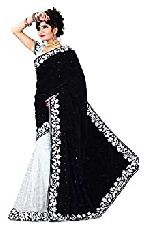

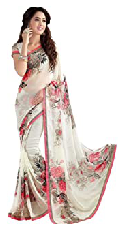

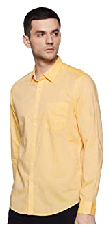

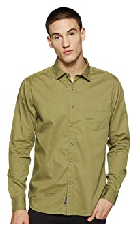

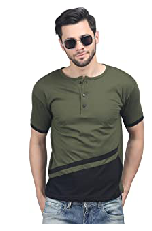

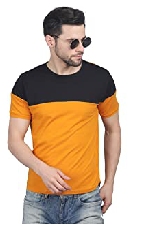

In [5]:
#lets see first two images of each  saree_dir_train, shirt_dir_train, t_shirt_dir_train dataset
import matplotlib.image as mpimg
Dir=[saree_dir_train, shirt_dir_train, t_shirt_dir_train]
for di in Dir:
    k=listdir(di)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(di,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

## Lets do augmentation techniques needs to be performed on all the images in  training dataset 
* Rotation Range (-30,30)
* Brightness (Increasing the brightness of the images once)
* Brightness (Decreasing the brightness of the images once)
* Flipping the images
* Sharpening

## Data Augmentation using OpenCV on the scrapped images

* In this section I perform these augmentation techniques Rotation Range (-30,30),Brightness (Increasing the brightness of the images once),Brightness (Decreasing the brightness of the images once),Flipping the images Sharpening on train dataset labels directories and save the augmented images into augmented and train labels directories.

In [6]:

for dir in Dir:
    if dir==saree_dir_aug:
        print("\nPerforming Augmentation operations on Saree images\n")
    elif dir==t_shirt_dir_aug:
        print("\nPerforming Augmentation operations on Tshirt images \n")
    elif dir==shirt_dir_aug:
        print("\nPerforming Augmentation operations on Shirt images\n")
    for i in listdir(dir):
        print("Input Image is: ",i)
        input_image=cv2.imread('{}/{}'.format(dir,i))
        input_image = cv2.resize(input_image, (150, 150), interpolation = cv2.INTER_AREA)
        print("Shape of the image is: ",input_image.shape)
        
        
        # Splitting up the filename
        fold=i.split('_')
        
        # Rotating images
        height,width=input_image.shape[:2]
        rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),30,.5)
        rotated_image=cv2.warpAffine(input_image,rotation_matrix,(width,height))
        
        # Deciding folder to save the image
        # checking first element of image name
        if fold[0]=="Shirt":
            # Save augmented Rotating images in augmented/shirts folder
            cv2.imwrite(shirt_dir_aug+'/{}_Rot.jpg'.format(i),rotated_image)
            # Save augmented Rotating images in train/shirts folder
            cv2.imwrite(shirt_dir_train+'/{}_Rot.jpg'.format(i),rotated_image)
        elif fold[0]=="Saree":
            # Save augmented Rotating images in augmented/Saree folder
            cv2.imwrite(saree_dir_aug+'/{}_Rot.jpg'.format(i),rotated_image)
            # Save augmented Rotating images in train/Saree folder
            cv2.imwrite(saree_dir_train+'/{}_Rot.jpg'.format(i),rotated_image)
        elif fold[0]=="Tshirt":
            # Save augmented Rotating images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_Rot.jpg'.format(i),rotated_image)
            # Save augmented Rotating images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_Rot.jpg'.format(i),rotated_image)
    
        # Horizontal Flipping of the images
        flip=cv2.flip(input_image,1)
        if fold[0]=="Shirt":
            # Save augmented Horizontal Flipping images in augmented/shirt folder
            cv2.imwrite(shirt_dir_aug+'/{}_flip.jpg'.format(i),flip)
            # Save augmented rotated_image in train/shirt folder
            cv2.imwrite(shirt_dir_train+'/{}_flip.jpg'.format(i),flip)
        elif fold[0]=="Saree":
            # Save augmented Horizontal Flipping images in augmented/Saree folder
            cv2.imwrite(saree_dir_aug+'/{}_flip.jpg'.format(i),flip)
            # Save augmented Horizontal Flipping images in train/Saree folder
            cv2.imwrite(saree_dir_train+'/{}_flip.jpg'.format(i),flip)
        elif fold[0]=="Tshirt":
            # Save augmented Horizontal Flipping images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_flip.jpg'.format(i),flip)
            # Save augmented Horizontal Flipping images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_flip.jpg'.format(i),flip)
    
        # Brightness Increase
        m=np.ones(input_image.shape,dtype="uint8")*75
        Added=cv2.add(input_image,m)
        if fold[0]=="Shirt":
            # Save augmented Brightness Increase images in augmented/shirts folder
            cv2.imwrite(shirt_dir_aug+'/{}_add.jpg'.format(i),Added)
            # Save augmented Brightness Increase images in train/shirts folder
            cv2.imwrite(shirt_dir_train+'/{}_add.jpg'.format(i),Added)
        elif fold[0]=="Saree":
            # Save augmented Brightness Increase images in augmented/Saree folder
            cv2.imwrite(saree_dir_aug+'/{}_add.jpg'.format(i),Added)
            # Save augmented Brightness Increase images in train/Saree folder
            cv2.imwrite(saree_dir_train+'/{}_add.jpg'.format(i),Added)
        elif fold[0]=="Tshirt":
            # Save augmented Brightness Increase images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_add.jpg'.format(i),Added)
            # Save augmented Brightness Increase images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_add.jpg'.format(i),Added)
    
        # Brightness Decrease
        Subtract=cv2.subtract(input_image,m)
        if fold[0]=="Shirt":
            # Save augmented Brightness Decrease images in augmented/shirts folder
            cv2.imwrite(shirt_dir_aug+'/{}_sub.jpg'.format(i),Subtract)
            # Save augmented Brightness Decrease images in train/shirts folder
            cv2.imwrite(shirt_dir_train+'/{}_sub.jpg'.format(i),Subtract)
        elif fold[0]=="Saree":
            # Save augmented Brightness Decrease images in augmented/Saree folder
            cv2.imwrite(saree_dir_aug+'/{}_sub.jpg'.format(i),Subtract)
            # Save augmented Brightness Decrease images in train/Saree folder
            cv2.imwrite(saree_dir_train+'/{}_sub.jpg'.format(i),Subtract)
        elif fold[0]=="Tshirt":
            # Save augmented Brightness Decrease images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_sub.jpg'.format(i),Subtract)
            # Save augmented Brightness Decrease images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_sub.jpg'.format(i),Subtract)

        # Sharpening Images
        kernel_sharpening=np.array([[-1,-1,-1],
                                    [-1,10,-1],
                                    [-1,-1,-1]])
        sharpened=cv2.filter2D(input_image,-1,kernel_sharpening)
        if fold[0]=="Shirt":
            # Save augmented Sharpening images in augmented/Tshirt folder
            cv2.imwrite(shirt_dir_aug+'/{}_sharp.jpg'.format(i),sharpened)
            # Save augmented Sharpening images in train/Tshirt folder
            cv2.imwrite(shirt_dir_train+'/{}_sharp.jpg'.format(i),sharpened)
        elif fold[0]=="Saree":
            # Save augmented Sharpening images in augmented/Tshirt folder
            cv2.imwrite(saree_dir_aug+'/{}_sharp.jpg'.format(i),sharpened)
            # Save augmented Sharpening images in train/Tshirt folder
            cv2.imwrite(saree_dir_train+'/{}_sharp.jpg'.format(i),sharpened)
        elif fold[0]=="Tshirt":
            # Save augmented Sharpening images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_sharp.jpg'.format(i),sharpened)
            # Save augmented Sharpening images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_sharp.jpg'.format(i),sharpened)    

Input Image is:  Saree_img_10.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_11.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_110.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_111.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_112.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_113.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_114.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_115.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_116.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_117.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_118.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_119.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_12.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_120.jpeg
Shape

Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_152.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_155.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_156.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_157.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_159.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_16.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_17.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_18.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_19.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_20.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_21.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_210.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_211.jpeg
Shape of the image is:  (150, 150, 3)
Input 

Shape of the image is:  (150, 150, 3)


## Let's check how many images there are in test , train and augmented directory


In [7]:
print("no of images of saree in augmented dataset ",len(os.listdir(saree_dir_aug)))
print("no of images of shirts in augmented dataset ",len(os.listdir(shirt_dir_aug)))
print("no of images of t-shirts in augmented dataset ",len(os.listdir(t_shirt_dir_aug)))

print("no of images of saree in train dataset ",len(os.listdir(saree_dir_train)))
print("no of images of shirts in train dataset ",len(os.listdir(shirt_dir_train)))
print("no of images of t-shirts in train dataset ",len(os.listdir(t_shirt_dir_train)))

print("no of images of saree in test dataset ",len(os.listdir(saree_dir_test)))
print("no of images of shirts in test dataset ",len(os.listdir(shirt_dir_test)))
print("no of images of t-shirts in test dataset ",len(os.listdir(t_shirt_dir_test)))



no of images of saree in augmented dataset  400
no of images of shirts in augmented dataset  400
no of images of t-shirts in augmented dataset  400
no of images of saree in train dataset  480
no of images of shirts in train dataset  480
no of images of t-shirts in train dataset  480
no of images of saree in test dataset  20
no of images of shirts in test dataset  20
no of images of t-shirts in test dataset  20


##  Training our model


In [68]:
input_shape=(150,150,3)
img_width=150
img_height=150

batch_size=12
epoch=100

train_data_dir='./ama-clothes/train'
validation_data_dir='./ama-clothes/test'

nb_train_samples=480
nb_validation_samples=20

model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer = RMSprop(lr = 0.001),metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_30 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_31 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 32)       

## Data Preprocessing


In [69]:
# Validation
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical',
                                                 shuffle=False)

# Training

train_generator=Data_gen.flow_from_directory(train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')



Found 60 images belonging to 3 classes.
Found 1440 images belonging to 3 classes.


## checking image after applying data augmentation technique


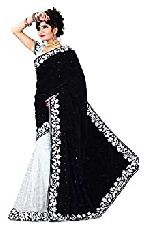

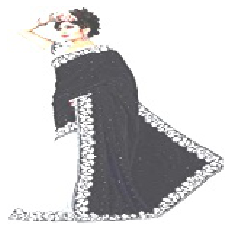

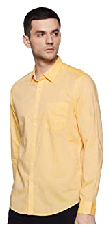

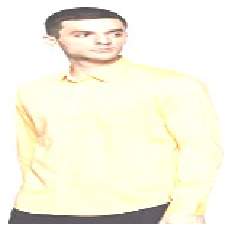

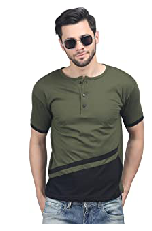

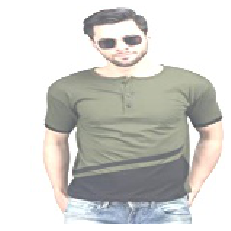

In [70]:
import matplotlib.image as mpimg

for di in Dir:
    k=listdir(di)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(di,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [71]:
# checking class indices
train_generator.class_indices

{'Saree': 0, 'Tshirts': 1, 'shirts': 2}

## EarlyStopping and ModelCheckpoint

In [72]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('clothes.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

## Training

In [73]:
history = model.fit_generator(
    train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[es, mc]
  
)

Epoch 1/100
40/40 [==============================] - ETA: 0s - loss: 1.3498 - accuracy: 0.3500
Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to clothes.h5
40/40 [==============================] - 8s 194ms/step - loss: 1.3498 - accuracy: 0.3500 - val_loss: 0.9933 - val_accuracy: 1.0000
Epoch 2/100
40/40 [==============================] - ETA: 0s - loss: 0.9998 - accuracy: 0.5000
Epoch 00002: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 188ms/step - loss: 0.9998 - accuracy: 0.5000 - val_loss: 0.3721 - val_accuracy: 1.0000
Epoch 3/100
40/40 [==============================] - ETA: 0s - loss: 0.8091 - accuracy: 0.6271
Epoch 00003: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 190ms/step - loss: 0.8091 - accuracy: 0.6271 - val_loss: 0.2013 - val_accuracy: 1.0000
Epoch 4/100
40/40 [==============================] - ETA: 0s - loss: 0.7004 - accuracy: 0.7000
Epoch 00004: val_accuracy did not

Epoch 30/100
40/40 [==============================] - ETA: 0s - loss: 0.2482 - accuracy: 0.9021
Epoch 00030: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 192ms/step - loss: 0.2482 - accuracy: 0.9021 - val_loss: 9.2885e-04 - val_accuracy: 1.0000
Epoch 31/100
40/40 [==============================] - ETA: 0s - loss: 0.2734 - accuracy: 0.8813
Epoch 00031: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 192ms/step - loss: 0.2734 - accuracy: 0.8813 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 32/100
40/40 [==============================] - ETA: 0s - loss: 0.2922 - accuracy: 0.8833
Epoch 00032: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 192ms/step - loss: 0.2922 - accuracy: 0.8833 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 33/100
40/40 [==============================] - ETA: 0s - loss: 0.2490 - accuracy: 0.9062
Epoch 00033: val_accuracy did not improve from 1.00000

Epoch 59/100
40/40 [==============================] - ETA: 0s - loss: 0.1807 - accuracy: 0.9229
Epoch 00059: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 194ms/step - loss: 0.1807 - accuracy: 0.9229 - val_loss: 6.0000e-06 - val_accuracy: 1.0000
Epoch 60/100
40/40 [==============================] - ETA: 0s - loss: 0.1720 - accuracy: 0.9438
Epoch 00060: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 193ms/step - loss: 0.1720 - accuracy: 0.9438 - val_loss: 2.0862e-07 - val_accuracy: 1.0000
Epoch 61/100
40/40 [==============================] - ETA: 0s - loss: 0.1499 - accuracy: 0.9604
Epoch 00061: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 192ms/step - loss: 0.1499 - accuracy: 0.9604 - val_loss: 3.8062e-05 - val_accuracy: 1.0000
Epoch 62/100
40/40 [==============================] - ETA: 0s - loss: 0.1556 - accuracy: 0.9479
Epoch 00062: val_accuracy did not improve from

Epoch 88/100
40/40 [==============================] - ETA: 0s - loss: 0.0946 - accuracy: 0.9667
Epoch 00088: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 208ms/step - loss: 0.0946 - accuracy: 0.9667 - val_loss: 3.9736e-08 - val_accuracy: 1.0000
Epoch 89/100
40/40 [==============================] - ETA: 0s - loss: 0.1841 - accuracy: 0.9375
Epoch 00089: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 206ms/step - loss: 0.1841 - accuracy: 0.9375 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 90/100
40/40 [==============================] - ETA: 0s - loss: 0.0930 - accuracy: 0.9646
Epoch 00090: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 210ms/step - loss: 0.0930 - accuracy: 0.9646 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 91/100
40/40 [==============================] - ETA: 0s - loss: 0.1387 - accuracy: 0.9396
Epoch 00091: val_accuracy did not improve from

In [74]:
#Save our model
model.save('clothes.h5')

In [75]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.349766,0.350000,9.932596e-01,1.0
1,0.999766,0.500000,3.721389e-01,1.0
2,0.809060,0.627083,2.013371e-01,1.0
3,0.700412,0.700000,3.713700e-01,1.0
4,0.671129,0.670833,2.279377e-01,1.0
...,...,...,...,...
88,0.184149,0.937500,0.000000e+00,1.0
89,0.092994,0.964583,0.000000e+00,1.0
90,0.138744,0.939583,2.966269e-04,1.0
91,0.190077,0.941667,6.457146e-07,1.0


## Plotting our model Accuracy and Loss


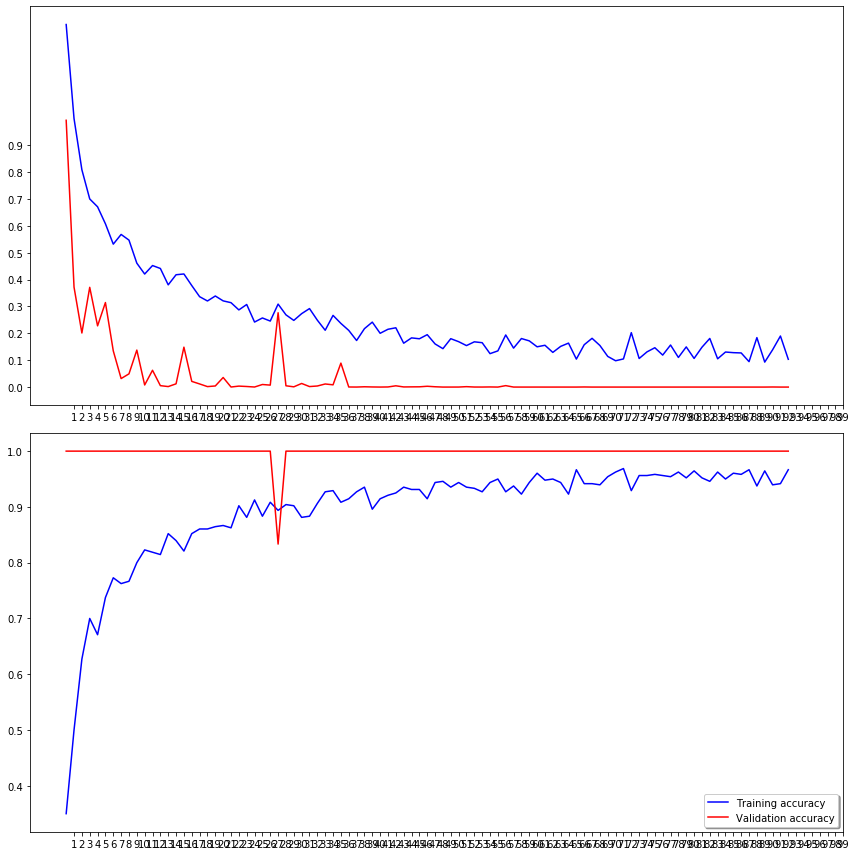

In [76]:
#Virtualize Training
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoch, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epoch, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [77]:
#lets evaluate our model
model.evaluate(validation_generator)

5/5 [==============================] - 0s 40ms/step - loss: 0.3791 - accuracy: 0.8833


[0.37906163930892944, 0.8833333253860474]

In [78]:
# As we can see that there are 3 classes for the 60 test images
validation_generator.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Predicting the Test images


In [79]:
pred = model.predict(validation_generator)

y_classes = pred.argmax(axis=-1)
print(y_classes)
res = pd.DataFrame()
res['ImageId'] = list(range(1,61))
res['Predicted_Label'] = y_classes
res['Actual_Label']=validation_generator.classes
res.head(50)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 0
 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]


,ImageId,Predicted_Label,Actual_Label
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
5,6,0,0
6,7,0,0
7,8,0,0
8,9,0,0
9,10,0,0


## Confution Matrix and Classification Report


In [80]:
from sklearn.metrics import classification_report, confusion_matrix
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}


Y_pred = model.predict(validation_generator, nb_validation_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[20  0  0]
 [ 1 14  5]
 [ 0  1 19]]
Classification Report
              precision    recall  f1-score   support

       Saree       0.95      1.00      0.98        20
     Tshirts       0.93      0.70      0.80        20
      shirts       0.79      0.95      0.86        20

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



In [81]:
#Lets load our model
from keras.models import load_model

saved_model = load_model('clothes.h5')

### Testing our  classifier using openCV

In [82]:
from keras.preprocessing import image
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 150, 150


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = './ama-clothes/test/'
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 8)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()